In [5]:
import pandas as pd

# Load clustered dataset
df = pd.read_csv("../reports/amazon_music_clusters.csv")
df.head()


,id_songs,name_song,popularity_songs,duration_ms,explicit,id_artists,release_date,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,time_signature,followers,genres,name_artists,popularity_artists,cluster
0,0IA0Hju8CAgYfV1hwhidBH,La Java,0,161427,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.563,0.184,4,...,0.000016,0.325,0.654,133.088,3,5078.0,['vintage chanson'],Mistinguett,22,3
1,1b8HZQCqcqwbzlA1jRTp6E,En Douce,0,223440,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.427,0.180,10,...,0.000000,0.128,0.431,78.459,3,5078.0,['vintage chanson'],Mistinguett,22,3
2,5d5gQxHwYovxR5pqETOIAa,J'en Ai Marre,0,208267,0,4AxgXfD7ISvJSTObqm4aIE,1922,0.511,0.206,0,...,0.000000,0.418,0.481,70.443,4,5078.0,['vintage chanson'],Mistinguett,22,3
3,1EO65UEEPfy7CR0NK2sDxy,Ils n'ont pas ca,0,161933,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.676,0.467,9,...,0.000000,0.219,0.726,129.775,4,5078.0,['vintage chanson'],Mistinguett,22,3
4,6a58gXSgqbIsXUhVZ6ZJqe,La belote,0,167973,0,4AxgXfD7ISvJSTObqm4aIE,1924,0.650,0.298,9,...,0.000000,0.373,0.844,75.950,4,5078.0,['vintage chanson'],Mistinguett,22,3


In [6]:
# Summarize features per cluster

features = [
    'danceability','energy','loudness','speechiness',
    'acousticness','instrumentalness','liveness','valence',
    'tempo','duration_ms'
]

cluster_profile = df.groupby('cluster')[features].mean()
print(cluster_profile)


         danceability    energy   loudness  speechiness  acousticness  \
cluster                                                                 
0            0.483390  0.412156 -14.009186     0.059805      0.651621   
1            0.634834  0.708920  -7.405223     0.076068      0.240630   
2            0.663553  0.466258 -13.305997     0.818556      0.582702   
3            0.505506  0.342998 -12.111583     0.062923      0.698644   

         instrumentalness  liveness   valence       tempo    duration_ms  
cluster                                                                   
0                0.811749  0.188999  0.448888  114.196251  228576.436121  
1                0.022045  0.201155  0.685373  125.271807  226304.140027  
2                0.001246  0.427244  0.585002  100.628536   91049.800032  
3                0.017483  0.184369  0.427756  113.553236  226674.120870  


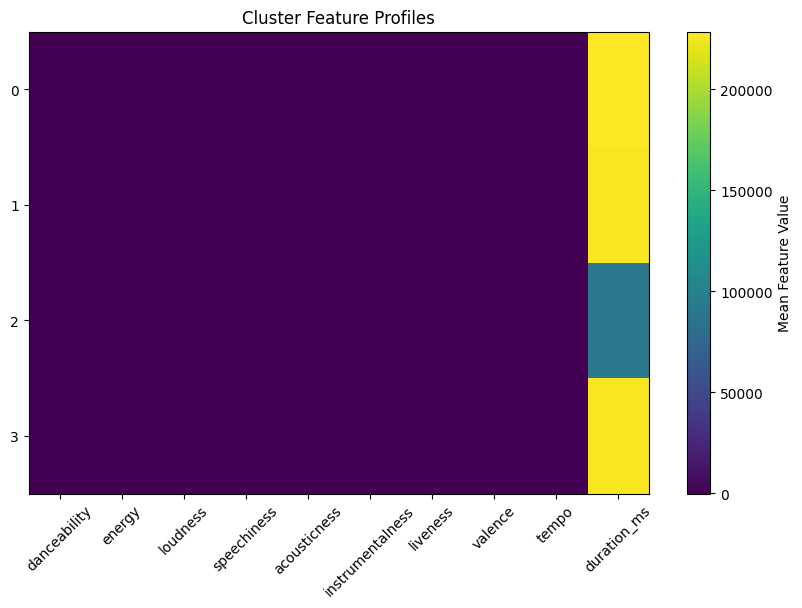

In [7]:
# Visualize cluster profiles

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.imshow(cluster_profile, aspect='auto', cmap="viridis")
plt.colorbar(label="Mean Feature Value")
plt.xticks(range(len(features)), features, rotation=45)
plt.yticks(range(len(cluster_profile.index)), cluster_profile.index)
plt.title("Cluster Feature Profiles")
plt.show()


In [8]:
# Check cluster sizes

print(df['cluster'].value_counts())


cluster
1    46141
3    29238
2    12662
0     7796
Name: count, dtype: int64


In [9]:
# Inspect example songs per cluster

for c in sorted(df['cluster'].unique()):
    print(f"\nCluster {c} examples:")
    display(df[df['cluster'] == c][['name_song','name_artists','danceability','energy']].head(5))



Cluster 0 examples:


,name_song,name_artists,danceability,energy
53,Veux Tu Que J'te Fasse Un Dessin,Georgius,0.625,0.2950
65,West End Blues,Louis Armstrong & His Hot Five,0.621,0.2740
67,Beau Koo Jack,Louis Armstrong & His Hot Five,0.733,0.4180
69,Gut Bucket Blues,Louis Armstrong & His Hot Five,0.602,0.2160
70,Skid-Dat-De-Dat,Louis Armstrong & His Hot Five,0.658,0.0841



Cluster 1 examples:


,name_song,name_artists,danceability,energy
128,Hotter Than That,Louis Armstrong & His Hot Five,0.794,0.431
199,Hotter Than That,Louis Armstrong & His Hot Five,0.794,0.426
215,Hotter Than That,Louis Armstrong & His Hot Five,0.795,0.425
341,Je Suis Aimé,Dranem,0.777,0.554
411,J't'emmène A La Campagne,Georges Milton,0.728,0.500



Cluster 2 examples:


,name_song,name_artists,danceability,energy
37,Dites Moi Doumergue,Perchicot,0.710,0.561
50,L'amour Excuse Tout,Georgius,0.655,0.433
55,Le Genre De La Maison,Georgius,0.700,0.518
60,Oh Oh Il Travaille Du Chapeau,Georgius,0.706,0.392
468,Quand je pense aux collections de monsieur,Jean Gabin,0.427,0.243



Cluster 3 examples:


,name_song,name_artists,danceability,energy
0,La Java,Mistinguett,0.563,0.184
1,En Douce,Mistinguett,0.427,0.180
2,J'en Ai Marre,Mistinguett,0.511,0.206
3,Ils n'ont pas ca,Mistinguett,0.676,0.467
4,La belote,Mistinguett,0.650,0.298


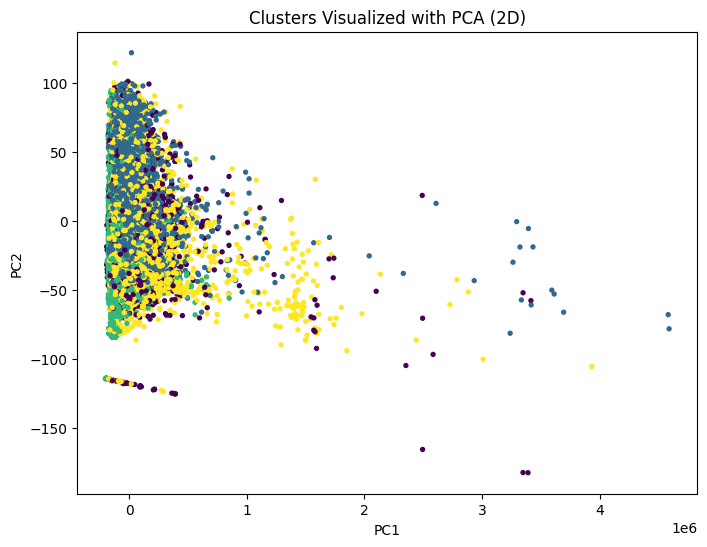

In [10]:
# PCA (2D projection)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select only scaled numeric features
features = [
    'danceability','energy','loudness','speechiness',
    'acousticness','instrumentalness','liveness','valence',
    'tempo','duration_ms'
]

X = df[features]

# PCA for visualization
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

df['pc1'] = X_pca[:,0]
df['pc2'] = X_pca[:,1]

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(df['pc1'], df['pc2'], c=df['cluster'], s=8)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters Visualized with PCA (2D)")
plt.show()


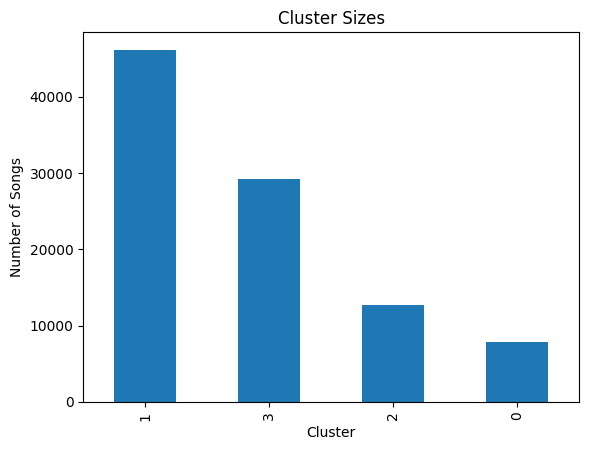

In [11]:
# Cluster size distribution

df['cluster'].value_counts().plot(kind="bar")
plt.title("Cluster Sizes")
plt.xlabel("Cluster")
plt.ylabel("Number of Songs")
plt.show()


In [12]:
# Save cluster profile summary

cluster_profile.to_csv("../reports/cluster_profile.csv")
print("✅ Cluster profile saved to reports/cluster_profile.csv")


✅ Cluster profile saved to reports/cluster_profile.csv
